# Teoría de Control práctica



## Variable de Proceso y Set Point
#### Variable de Proceso

La variable medida que se desea estabilizar (controlar) recibe el nombre de variable de proceso ("process value") y se abrevia **PV**.
Un buen ejemplo de variable de proceso es la temperatura, la cual mide el instrumento controlador mediante un termopar o una Pt100.

Otro ejemplo de PV puede ser un caudal (litros/minuto), éste se mide mediante algún sensor y su transductor adecuado que entreguen una señal de 4 a 20 mA proporcional al caudal. La corriente 4 a 20 mA entra en el controlador en donde se reescala a las unidades originales de la PV.

Ejemplos adicionales de PV pueden ser velocidad, presión, humedad, etc. cada una de las cuales se mide con el sensor apropiado y se convierten comúnmente a 4...20mA para ingresar al control.

En adelante durante todo este documento se usará la temperatura como ejemplo de PV por ser lo más intuitivo. Esto no hace perder generalidad, pues todo lo que se hable sobre temperatura y hornos es perfectamente análogo a sistemas de control de velocidad, presión, etc.

#### Set Point 

El valor prefijado (Set Point, **SP**) es el valor deseado de la variable de proceso, es el valor al cual el control debe mantener la PV.
Por ejemplo, en un horno si la temperatura actual es 155 °C y el controlador está programado para llevar la temperatura a 200°C, PV=155 y SP=200.

#### Error

Se define error como la diferencia entre la variable de proceso PV y el set point SP,
$$
E = SP - PV
$$
En el ejemplo anterior 
$$
\begin{align*}
E &= (SP - PV) \\
&= (200 ^\circ C - 155 ^\circ C)\\ 
&= 45 ^\circ C
\end{align*}
$$
Recuerde que el error será *positivo* cuando la temperatura sea menor que el set point, *PV < SP* .

## Control On/Off
Tomemos por ejemplo, el caso de un horno eléctrico. La temperatura aumenta al activar las resistencias de calentamiento mediante un contactor, gobernado a su vez por una relé o un transistor dentro del controlador.

El modo de control ON/OFF es el más elemental y consiste en dar la orden de calentamiento cuando la temperatura está por debajo de la temperatura deseada SP y luego desactivarla cuando la temperatura esté por arriba.






Populating the interactive namespace from numpy and matplotlib


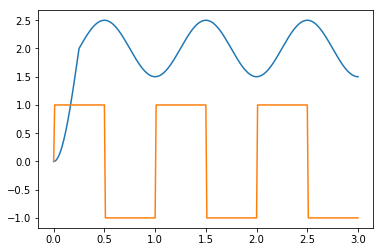

In [53]:
%pylab inline
def prueba2(x):
    escala = 2
    return where(x<0.26, escala * (1-cos(2*pi*x)), 0.5 *(4-cos(2*pi*x)) )  
    
freq = 1
t = linspace(0,3,301) #two cycles, 100 points each
y1 = pi*(sin(2*pi*freq*t))

sqwave = sign(sin(2*pi*freq*t)) #an actual square wave
plot( t, prueba2(t), t, sqwave)

Inevitablemente, debido a la inercia térmica del horno la temperatura estará continuamente fluctuando alrededor del SP.

La inercia térmica es consecuencia del retardo en la propagación del calor en el interior del horno desde la resistencia de calentamiento hasta el sensor de temperatura.

No es difícil imaginar que las **fluctuaciones aumentarán cuanto mayor sea la inercia térmica** del horno (retardo).

Evidentemente este algoritmo de control no es el más adecuado cuando se desea una temperatura constante y uniforme, pero sí ofrece la ventaja de provocar poco desgaste en los contactores, pues estos se activan y desactivan lo mínimo necesario.

#### Control On/Off con histéresis
Incluso para reducir aún más el desgaste a veces se efectúa un control ON/OFF con histéresis, es decir que el mando de calentamiento se activa unos pocos grados por arriba del SP y se desactiva unos grados por abajo del SP, provocando por supuesto una mayor fluctuación de la temperatura pero menos activaciones de los contactores.

El control ON/OFF con histéresis se usa generalmente en cámaras frigoríficas donde la temperatura debe estar dentro de un rango y se desea activar y desactivar lo menos posible los motores del sistema de refrigeración.

## PWM y tiempo de ciclo
#### Por que hace falta un control proporcional
Para poder controlar la temperatura con menos fluctuaciones, se debe poder entregar al horno una potencia gradual, en la medida requerida para mantenerlo a la temperatura deseada.

En el ejemplo anterior del control On/Off, el relé del mando de calentamiento estará activado 100%, entregando el máximo de potencia al horno o bien desactivado sin entregar potencia.

El controlador proporcional entrega una potencia que varía en forma gradual entre 0 y 100% según se requiera y en forma proporcional al error (SP-PV).

Lo más natural para entregar una potencia que varia de 0% a 100% en forma continua seria usar un horno a petróleo o gas y que el control module la potencia mediante la llave de paso del combustible. La llave cerrada seria 0% de potencia y la llave totalmente abierta seria 100%.

El problema es que una **válvula motorizada** (gobernada mediante una señal 4..20 mA) es costosa y solo se justifica en aplicaciones que así lo requieran.

#### Tiempo de ciclo y PWM

Afortunadamente es posible modular de 0% a 100% la potencia que recibe un horno eléctrico mediante el mismo contactor que se usaría para un control on/off.

La idea es modular el tiempo de activación del contactor durante un lapso de tiempo fijo tc, llamado **tiempo de ciclo**, menor al tiempo característico de respuesta del horno de modo que el horno reciba finalmente un promedio de la potencia.

Para ilustrar esta técnica conocida como modulación por ancho de pulso (**PWM pulse width modulation**) recurrimos al siguiente ejemplo:

`Suponiendo que un horno posee un tiempo de respuesta de 1 minuto. Al aplicarle pulsos de calentamiento periódicos de 4 segundos, modulados en duración, el horno experimentará un calentamiento proporcional al promedio de tiempo que ha estado activado, sin que su temperatura siga las fluctuaciones de 4 segundos con que se aplica la potencia.`
`Supongamos que nuestro horno funciona con un calefactor de 1000W, si se requiere una potencia de 500W, equivalente a 50% de la total, entonces se activa 2 segundos el relé y se desactiva otros 2, para luego empezar otro ciclo.`
`El efecto neto será que el horno recibe 50% de la potencia pero la temperatura no fluctúa al ritmo del tiempo de ciclo pues este es menor al tiempo de respuesta del horno.`
`Siguiendo con el ejemplo, si hace falta 250W, es decir 25% de la potencia basta con tener 1 segundo activado el relé y 3 segundos desactivado.`

Para sistemas típicos el tiempo de ciclo se ajusta entre 1 y 200 segundos según sea el caso.

A mayor tiempo de ciclo, menos desgaste de los contactores, pero siempre tiene que ser inferior al **tiempo característico del sistema**.
La práctica recomendada es usar un tiempo de ciclo igual a la mitad del tiempo característico del sistema.


## Control Proporcional

Control proporcional

Ya se menciono que el controlador proporcional entrega una potencia que varía en forma proporcional al error (SP-PV).
Para poner en marcha un controlador proporcional se deben fijar los siguientes parámetros:

- la temperatura deseada SP , por ej. SP = 200 °C
- la banda proporcional Pb, por ej. Pb = 10 %
- el tiempo de ciclo tc, por ej. tc = 4 seg.

Por supuesto no hace falta definir el tiempo de ciclo si se va a usar una válvula motorizada como mecanismo de control.

La banda proporcional Pb se programa en el controlador como un porcentaje del SP.
Corresponde a una banda de temperatura situada por debajo del SP a lo largo de la cual, la potencia de salida variará proporcionalmente al error (SP-PV), disminuyendo cuanto más cercana sea la temperatura al SP.
Internamente el controlador realizará el cálculo del porcentaje de salida *Out* mediante la siguiente fórmula:
$$
Out = [100\% * \frac{E}{banda}] 
$$

$$
banda = Pb * \frac{SP}{100}
$$

$$
E = (SP - PV)
$$

El corchete [ ] se usa para indicar saturación, es decir que si al evaluar el interior, resulta mayor de 100%, se deja en 100% y si resulta 0 o negativo, se deja en 0%.


## Control Proporcional Derivativo PD

## Control Proporcional Integral PI

## Control Proporcional Integral Derivativo PID

## Sintonización de un control PID

### Oscilaciones en lazo cerrado

### Respuesta al escalón